In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Подготовка

Вариант: 2 (e-learning)

Прежде, чем проводить анализ, посмотрим на наши таблицы


**assessments.csv** — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

- *code_module* — идентификационный код предмета.

- *code_presentation* — семестр (Идентификационный код).

- *id_assessment* — тест (Идентификационный номер ассессмента).

- *assessment_type* — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

- *date* — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

- *weight* — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

In [2]:
assessments = pd.read_csv('assessments.csv')

In [3]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [4]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [5]:
assessments.shape

(206, 6)

**courses.csv** — файл содержит список предметов по семестрам.

- *code_module* — предмет (идентификационный код).

- *code_presentation* — семестр (идентификационный код).

- *module_presentation_length* — продолжительность семестра в днях.

In [6]:
courses = pd.read_csv('courses.csv')

In [7]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [8]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [9]:
courses.shape

(22, 3)

**studentAssessment.csv** — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

- *id_assessment* — тест (идентификационный номер).

- *id_student* — идентификационный номер студента.

- *date_submitted* — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

- *is_banked* — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

- *score* — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

In [10]:
studentAssessment = pd.read_csv('studentAssessment.csv')

In [11]:
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [12]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [13]:
studentAssessment.shape

(173912, 5)

**studentRegistration.csv** — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

- *code_module* — предмет (идентификационный код).

- *code_presentation* — семестр (идентификационный код)

- *id_student* — идентификационный номер студента.

- *date_registration* — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

- *date_unregistration* — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [14]:
studentRegistration = pd.read_csv('studentRegistration.csv')

In [15]:
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [16]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [17]:
studentRegistration.shape

(32593, 5)

### Задание 1

Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене).

Сначала определимся, что мы будем понимать под словом "курс" в рамках данного проекта, а именно, следуя данным в таблице *courses*, связку предмета и семестра. То есть если предмет присутствует в n числе семестров, то это будет n число курсов. 

Далее требуется найти всех студентов, которые получили за экзамен >= 40 баллов только один раз. Здесь возникает первая трудность. Если взглянуть на список экзаменов в таблице  *assessments*, то можно заметить, что в двух курсах предмета *CCC* в одном семестре присутствует сразу по 2 экзамена, как это учитывть?

In [18]:
assessments.query('assessment_type == "Exam"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


Но нам повезло (или наоборот) с данными, и в таблице *studentAssessment* нет информации по одному из экзаменов для каждого курса предмета *CCC*. Как дальше будет показано, из 24 экзаменов информация имеется только по шести.

In [19]:
# Соединим таблицу с информацией о тестах с таблицей с информацией о их сдаче

full_studentAssessment = studentAssessment.merge(assessments, on='id_assessment')

In [20]:
# Так выглядит итоговая таблица

full_studentAssessment 

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


In [21]:
# В массиве приведены повторяющиеся тесты для предмета CCC и показано, что информация есть только по двум из них (в разных семестрах)

full_studentAssessment.query('id_assessment in (24290, 40087, 24299, 40088)')[['id_assessment', 'code_presentation']].value_counts()

id_assessment  code_presentation
24299          2014J                1168
24290          2014B                 747
dtype: int64

Теперь мы точно уверены, что каждому экзамену соответствует только один курс 

In [22]:
# Отбираем строки с информацией об успешной сдаче экзаменов, группируем по студентам, 
# считаем кол-во сданных экзаменов студентом и отбираем только тех, кто сдал один экзамен

len(full_studentAssessment.query('assessment_type == "Exam" and score >= 40') \
.groupby('id_student') \
.agg({'assessment_type': 'count'}) \
.query('assessment_type == 1') 
)

3802

С другой стороны можно было бы воспользоваться таблицей *studentRegistration*, где указано, что столбец *date_unregistration* для студентов, окончивших курс, остаётся пустым (`NaN`). Но докажем, что данный вариант не может быть использован в нашем случае.

In [23]:
# Выберем студента, который сдал 2 экзамена с неудовлетворительым результатом

full_studentAssessment.query('assessment_type == "Exam" & id_student == 558914')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
70122,25340,558914,230,0,36.0,DDD,2013B,Exam,240.0,100.0


In [24]:
# Посмотрим, что записано в таблице studentRegistration для этого студента

studentRegistration.query('id_student == 558914')

,code_module,code_presentation,id_student,date_registration,date_unregistration
9419,CCC,2014B,558914,-74.0,NaN
14140,DDD,2013B,558914,-24.0,NaN


Отсюда видно, что оконание курса не является успешной сдачей. Окончить курс можно и набрав меньше 40 баллов за экзамены

#### Ответ: 3802 студента сдали успешно только один курс

### Задание 2

Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

*Прим.* Так как мы определили понятие курса для нашего проекта, что означает соответствие одному курсу одного экзамена, то такая формулировка задания является бессмысленной с точки зрения аналитики. Корректнее будет найти такие экзамены в рамках предметов.

In [25]:
# Проверим таблицу full_studentAssessment на полноту данных

full_studentAssessment.id_assessment.nunique()

188

In [26]:
# Как видим, разница между полным списком тестов и списком тестов, которые хотя бы раз проходили, составляет 18

assessments.id_assessment.nunique()

206

In [27]:
# Посмотрим, что это за тесты 

assessments.query('assessment_type == "Exam"').id_assessment.nunique()

24

In [28]:
# Как видим все 18 пропущенных тестов является экзаменами

full_studentAssessment.query('assessment_type == "Exam"').id_assessment.nunique()

6

In [29]:
# Получим количество успешных попыток сдачи экзаменов

successful_pass = full_studentAssessment.query('assessment_type == "Exam" and score >= 40') \
    .groupby(['code_module', 'id_assessment'], as_index=False) \
    .agg({'score': 'count'}) \
    .rename(columns={'score': 'successful_pass'})

In [30]:
successful_pass

,code_module,id_assessment,successful_pass
0,CCC,24290,664
1,CCC,24299,1019
2,DDD,25340,504
3,DDD,25354,878
4,DDD,25361,485
5,DDD,25368,842


In [31]:
# Получим количество всех попыток сдачи экзаменов

passes_count = full_studentAssessment.query('assessment_type == "Exam"') \
.groupby(['code_module', 'id_assessment'], as_index=False) \
.agg({'score': 'count'}) \
.rename(columns={'score': 'passes_count'})

In [32]:
passes_count

,code_module,id_assessment,passes_count
0,CCC,24290,747
1,CCC,24299,1168
2,DDD,25340,602
3,DDD,25354,968
4,DDD,25361,524
5,DDD,25368,950


In [33]:
# Соединим полученные таблицы по id теста (экзамена в нашем случае) и коду предмета

exam_completion = successful_pass.merge(passes_count, on=['id_assessment', 'code_module'])

In [34]:
# Вычислим завершаемость с точностью до 3-ёх знаков после запятой
exam_completion['completion'] = round(exam_completion.successful_pass / exam_completion.passes_count, 3)

In [35]:
exam_completion.sort_values(['code_module', 'completion'], ascending=[True, False]).style.format({'completion': '{:.2%}'})

,code_module,id_assessment,successful_pass,passes_count,completion
0,CCC,24290,664,747,88.90%
1,CCC,24299,1019,1168,87.20%
4,DDD,25361,485,524,92.60%
3,DDD,25354,878,968,90.70%
5,DDD,25368,842,950,88.60%
2,DDD,25340,504,602,83.70%


In [36]:
# Ответим на поставленный в задании вопрос

exam_completion.set_index('id_assessment').groupby('code_module', as_index=False).agg({'completion': ['idxmin', 'idxmax']})

code_module completion       
                  idxmin idxmax
0         CCC      24299  24290
1         DDD      25340  25361

#### Ответ: для предмета *CCC* самой низкой завершаемостью обладает экзамен 24299, самой высокой - 24290. Для предмета *DDD* самой низкой завершаемостью обладает экзамен 25340, самой высокой - 25361.

### Задание 3

По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). 

In [37]:
# Видим, что пересдач по экзаменам не наблюдается, что упрощает задачу

full_studentAssessment.query('assessment_type == "Exam"').sort_values('is_banked', ascending=False).head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
83249,25354,473340,237,0,40.0,DDD,2013J,Exam,261.0,100.0
83256,25354,477161,242,0,40.0,DDD,2013J,Exam,261.0,100.0
83255,25354,477128,241,0,82.0,DDD,2013J,Exam,261.0,100.0
83254,25354,477120,237,0,60.0,DDD,2013J,Exam,261.0,100.0


In [38]:
# Остается только посчитать среднее количество дней до успешной сдачи экзамена

full_studentAssessment.query('assessment_type == "Exam" and score >= 40').groupby('code_module').agg({'date_submitted': 'mean'}).round()

,date_submitted
code_module,
CCC,239.0
DDD,238.0


### Задание 4

Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3).

Несколько условий, которые мы примем для этого задания: 

1. Для поиска кол-ва зарегестрировавшихся студентов будем считать столбец id_student вместо date_registration, так как для некоторых студентов ввиду каких-то причин не указана дата регистрации (`NaN`), но тесты они проходили
2. Считать самые популярные курсы по количеству регистраций вполне корректно, но считать курсы с самым большим оттоком по количеству выходов с них - не самый лучший вариант, ведь чем больше регистраций - тем больше и выходов, поэтому добавим столбец с % выходов с курса и посчитаем топ-3 по оттоку, основываясь на этом столбце
3. Исключим из нашего анализа студентов, которые вышли с курса до его начала (в столбце кол-ва регистраций тоже учитывать их не будем)

In [39]:
# Создадим таблицу с подсчётом количества регистраций и выходов с курсов.

registration_and_unregistration_count = studentRegistration.query('date_unregistration >= 0 or date_unregistration != date_unregistration') \
.groupby(['code_module', 'code_presentation'], as_index=False) \
.agg({'id_student': 'count', 'date_unregistration': 'count'}) \
.sort_values('id_student', ascending=False) \
.reset_index(drop=True) \
.rename(columns={'id_student': 'registration_count', 'date_unregistration': 'unregistration_count'})

In [40]:
# Создаем столбец churn_percentage

registration_and_unregistration_count['churn_percentage'] = round(registration_and_unregistration_count.unregistration_count / registration_and_unregistration_count.registration_count * 100, 2)

In [41]:
# ТОП-3 самых популярных курсов

registration_and_unregistration_count.head(3)[['code_module', 'code_presentation', 'registration_count']]

,code_module,code_presentation,registration_count
0,CCC,2014J,2285
1,FFF,2014J,2170
2,FFF,2013J,2112


In [42]:
# ТОП-3 курсов с самым большим оттоком

registration_and_unregistration_count.sort_values('churn_percentage', ascending=False).head(3)[['code_module', 'code_presentation', 'churn_percentage']]

,code_module,code_presentation,churn_percentage
6,CCC,2014B,38.43
0,CCC,2014J,36.59
13,DDD,2014B,34.43


### Задание 5

Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

In [43]:
def semester_analysis(data=full_studentAssessment):

    # По аналогии с заданием 3 считаем среднее время (в днях) сдачи экзаменов относительно семестров
    result_df = data.query('assessment_type == "Exam" and score >= 40') \
    .groupby('code_presentation', as_index=False) \
    .agg({'date_submitted': 'mean'}) \
    .round() \
    .rename(columns={'date_submitted': 'mean_date_submitted'})

    # Также по аналогии с заданием 2 считаем завершаемость курсов относительно семестров
    sem_passes_count = data.query('assessment_type == "Exam"') \
    .groupby('code_presentation', as_index=False) \
    .agg({'score': 'count'}) \
    .rename(columns={'score': 'passes_count'})

    sem_successful_pass = data.query('assessment_type == "Exam" and score >= 40') \
    .groupby('code_presentation', as_index=False) \
    .agg({'score': 'count'}) \
    .rename(columns={'score': 'successful_pass'})

    sem_successful_pass = sem_successful_pass.merge(sem_passes_count, on='code_presentation')
    sem_successful_pass['completion'] = sem_successful_pass.successful_pass / sem_successful_pass.passes_count

    result_df = result_df.merge(sem_successful_pass[['code_presentation', 'completion']], on='code_presentation')

    # Добавим немного стилизации итоговой таблицы
    my_style = (result_df
        .style
        .background_gradient(cmap='Reds')
        .format({'completion': '{:.2%}', 'mean_date_submitted': '{:.0f} days'})
    )
 
    return my_style
    


In [44]:
semester_analysis()

,code_presentation,mean_date_submitted,completion
0,2013B,230 days,83.72%
1,2013J,240 days,90.70%
2,2014B,233 days,90.40%
3,2014J,244 days,87.87%


#### Ответ: самые долгие средние сроки сдачи наблюдаются в семестре 2014J, а самая низкая завершаемость в семестре 2013B

### Задание 6

Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: 

R - среднее время сдачи одного экзамена, 

F - завершаемость курсов, 

M - среднее количество баллов, получаемое за экзамен. 

Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 0.1 до 0.5, monetary от 55 до 72 баллов.

#### Метрика R 

In [45]:
# Получаем таблицу со средним временем сдачи (необязательно успешной) экзаменов каждым студентом

rfm_data = full_studentAssessment.query('assessment_type == "Exam"') \
.groupby('id_student', as_index=False) \
.agg({'date_submitted': 'mean'}) \
.round() \
.rename(columns={'date_submitted': 'mean_date_submitted'})


In [46]:
rfm_data.sort_values('mean_date_submitted', ascending=False)

,id_student,mean_date_submitted
1707,555498,285.0
4374,2341830,279.0
1704,555008,266.0
532,352637,259.0
2270,586668,256.0
...,...,...
1504,542049,229.0
4273,2080539,229.0
1822,560444,229.0
4379,2348111,229.0


In [47]:
rfm_data.mean_date_submitted.describe()

count    4633.000000
mean      238.464926
std         5.650564
min       229.000000
25%       234.000000
50%       241.000000
75%       243.000000
max       285.000000
Name: mean_date_submitted, dtype: float64

В качестве границ метрики выберем 25 и 75 перцентиль, так мы получим следующие группы:
- 3 - до 25% будут самые быстрые в плане сдачи экзаменов студенты
- 2 - самая многочисленна группа, которая включает в себя 50% от всех студентов, располагающихся в равной степени по обе стороны медины 
- 1 - 25% студентов, отстающих от основной группы 


In [48]:
r_borders = rfm_data.mean_date_submitted.quantile([.25, .75]).to_dict()

In [49]:
r_borders

{0.25: 234.0, 0.75: 243.0}

In [50]:
def r_metrics(days, borders):
    if days <= borders[.25]:
        return '3'
    elif days <= borders[.75]:
        return '2'
    else:
        return '1'
    

In [51]:
rfm_data['R'] = rfm_data.mean_date_submitted.apply(lambda x: r_metrics(x, r_borders))

In [52]:
rfm_data.head(10)

,id_student,mean_date_submitted,R
0,23698,243.0,2
1,24213,236.0,2
2,27116,243.0,2
3,28046,237.0,2
4,28787,243.0,2
5,29411,237.0,2
6,29420,244.0,1
7,29639,248.0,1
8,29764,230.0,3
9,29820,230.0,3


#### Метрика F 

Посмотрим, какая завершаемость курсов у каждого студента, сдававшего экзамены

In [53]:
students_passes_count = full_studentAssessment.query('assessment_type == "Exam"') \
.groupby('id_student', as_index=False) \
.agg({'score': 'count'}) \
.rename(columns={'score': 'passes_count'}) \
.sort_values('passes_count')

In [54]:
students_passes_count = students_passes_count.merge(
    full_studentAssessment.query('assessment_type == "Exam" and score >= 40') \
                        .groupby('id_student', as_index=False) \
                        .agg({'score': 'count'}) \
                        .rename(columns={'score': 'successful_pass'}) \
                        .sort_values('successful_pass'),
    on='id_student',
    how='left'
).fillna(0)

In [55]:
students_passes_count['completion'] = students_passes_count.successful_pass / students_passes_count.passes_count

In [56]:
rfm_data = rfm_data.merge(students_passes_count[['id_student', 'completion']], on='id_student')

Как видим, завершаемость у нас принимает только 3 значения: 0, 0.5 и 1, соответственно разобъем студентов на три группы по этим значениям:

- 3 - 100% завершаемость 
- 2 - 50% завершаемость
- 1 - 0% завершаемость

In [57]:
rfm_data.completion.unique()

array([1. , 0. , 0.5])

In [58]:
f_borders = [0, 0.5, 1]

In [59]:
def f_metrics(completion, borders):
    if completion == borders[2]:
        return '3'
    elif completion == borders[1]:
        return '2'
    else:
        return '1'

In [60]:
rfm_data['F'] = rfm_data.completion.apply(lambda x: f_metrics(x, f_borders))

In [61]:
rfm_data

,id_student,mean_date_submitted,R,completion,F
0,23698,243.0,2,1.0,3
1,24213,236.0,2,1.0,3
2,27116,243.0,2,1.0,3
3,28046,237.0,2,1.0,3
4,28787,243.0,2,1.0,3
...,...,...,...,...,...
4628,2694886,236.0,2,1.0,3
4629,2694933,230.0,3,1.0,3
4630,2695608,237.0,2,1.0,3
4631,2697181,230.0,3,1.0,3


#### Метрика М

Воспользуемся данной шкалой оценивания:

- 4 - 90-100: отлично
- 3 - 70-89: хорошо
- 2 - 40-69: удовлетворительно
- 1 - 0-39: незачет

Границы сегмента 2 пришлось сдвинуть на 10 пунктов вниз, так как по заданию зачетом является набор хотя бы 40 баллов

In [62]:
rfm_data = rfm_data.merge(
    full_studentAssessment.query('assessment_type == "Exam"') \
    .groupby('id_student', as_index=False) \
    .agg({'score': 'mean'}),
    on='id_student'
    )

In [63]:
m_borders = [90, 70, 40]

In [64]:
def m_metrics(score, borders):
    if score >= borders[0]:
        return '4'
    elif score >= borders[1]:
        return '3'
    elif score >= borders[2]:
        return '2'
    else:
        return '1'

In [65]:
rfm_data['M'] = rfm_data.score.apply(lambda x: m_metrics(x, m_borders))

#### Выводы RFM анализа

In [66]:
rfm_data = rfm_data.reindex(columns=['id_student', 'mean_date_submitted', 'completion', 'score', 'R', 'F', 'M'])

In [67]:
rfm_data['RFM'] = rfm_data.R + rfm_data.F + rfm_data.M

In [68]:
rfm_data.head()

,id_student,mean_date_submitted,completion,score,R,F,M,RFM
0,23698,243.0,1.0,80.0,2,3,3,233
1,24213,236.0,1.0,58.0,2,3,2,232
2,27116,243.0,1.0,96.0,2,3,4,234
3,28046,237.0,1.0,40.0,2,3,2,232
4,28787,243.0,1.0,44.0,2,3,2,232


In [69]:
def segmentation(rfm):
    segments = {
        0: {'1': 'отстающий студент', '2': 'средний студент', '3': 'быстрый студент'},
        1: {'1': 'с плохой заверш-тью', '2': 'со средней заверша-ью', '3': 'с великолепной заверш-тью'},
        2: {'1': 'и неудовл. оценками',
            '2': 'и удовл. оценками',
            '3': 'и хор. оценками',
            '4': 'и отл. оценками'
        }
    }
    result = ''
    for i, rfm_score in enumerate(rfm, start=0):
        result += f'{segments[i][rfm_score]} '

    return result



In [70]:
rfm_data['segments'] = rfm_data.RFM.apply(lambda x: segmentation(x))

In [71]:
pd.options.display.max_colwidth = 100

In [72]:
rfm_data

,id_student,mean_date_submitted,completion,score,R,F,M,RFM,segments
0,23698,243.0,1.0,80.0,2,3,3,233,средний студент с великолепной заверш-тью и хор. оценками
1,24213,236.0,1.0,58.0,2,3,2,232,средний студент с великолепной заверш-тью и удовл. оценками
2,27116,243.0,1.0,96.0,2,3,4,234,средний студент с великолепной заверш-тью и отл. оценками
3,28046,237.0,1.0,40.0,2,3,2,232,средний студент с великолепной заверш-тью и удовл. оценками
4,28787,243.0,1.0,44.0,2,3,2,232,средний студент с великолепной заверш-тью и удовл. оценками
...,...,...,...,...,...,...,...,...,...
4628,2694886,236.0,1.0,69.0,2,3,2,232,средний студент с великолепной заверш-тью и удовл. оценками
4629,2694933,230.0,1.0,73.0,3,3,3,333,быстрый студент с великолепной заверш-тью и хор. оценками
4630,2695608,237.0,1.0,73.0,2,3,3,233,средний студент с великолепной заверш-тью и хор. оценками
4631,2697181,230.0,1.0,80.0,3,3,3,333,быстрый студент с великолепной заверш-тью и хор. оценками


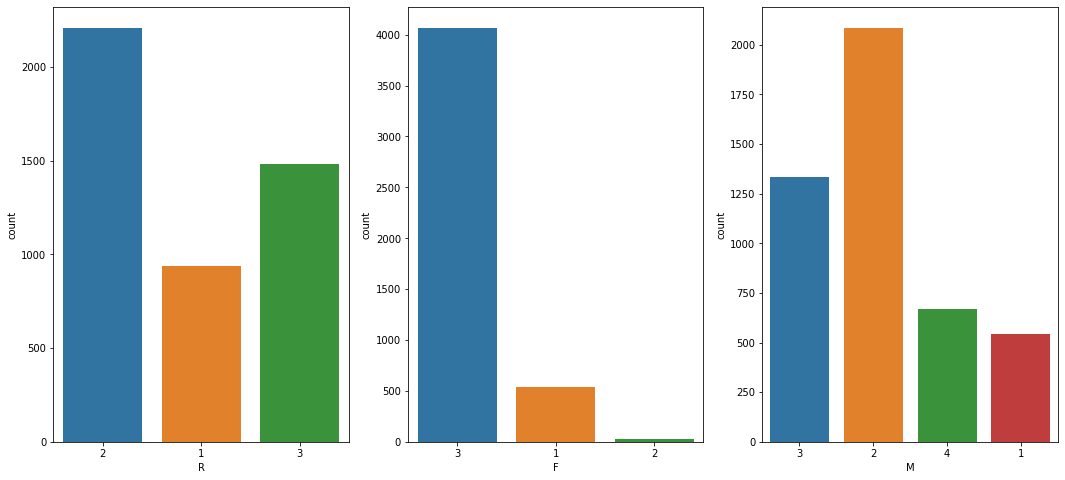

In [73]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))
sns.countplot(x='R', data=rfm_data, ax=ax[0]) 
sns.countplot(x='F', data=rfm_data, ax=ax[1]) 
sns.countplot(x='M', data=rfm_data, ax=ax[2]) 
plt.show()

<AxesSubplot:xlabel='count', ylabel='segments'>

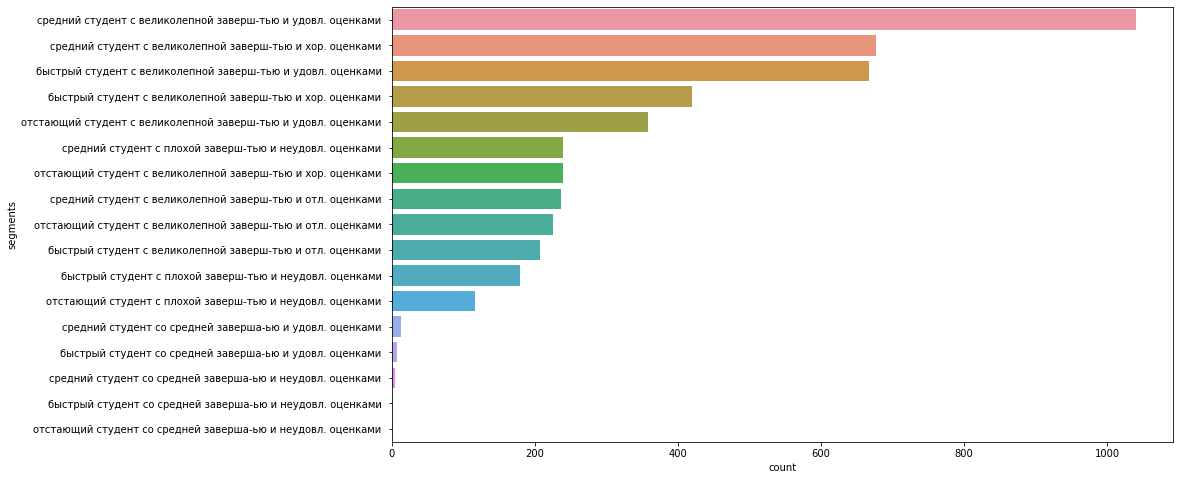

In [74]:
plt.figure(figsize=(14, 8))
sns.countplot(y='segments', data=rfm_data, order=rfm_data['segments'].value_counts().index) 